In [1]:
import pandas as pd
import numpy as np
from alg import Kmeans as KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from kmeansplus import k_init
from sklearn.utils.extmath import row_norms
from sklearn.utils import check_random_state
from sklearn.cluster import KMeans as skKMeans

In [2]:

# data = pd.read_csv('s1.csv', sep=',')
data = pd.read_csv('g2-2-20.csv', sep='\t')

In [3]:
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data))

In [4]:
# K-means++ für erste Cluster
N = 2
random_state = 42
fit_data = np.asarray(data_scaled)
x_squared_norms = row_norms(fit_data, squared=True)
random = check_random_state(random_state)
initial_clusters = k_init(fit_data, N, x_squared_norms, random)

max_norm = KMeans(N, initial_clusters, order=np.inf)
max_norm.fit(fit_data)
manhattan = KMeans(N, initial_clusters, order=1)
manhattan.fit(fit_data)
euclid = KMeans(N, initial_clusters, order=2)
euclid.fit(fit_data)

Anzahl Iterationen bei ord=inf: 2
Anzahl Iterationen bei ord=1: 1
Anzahl Iterationen bei ord=2: 1


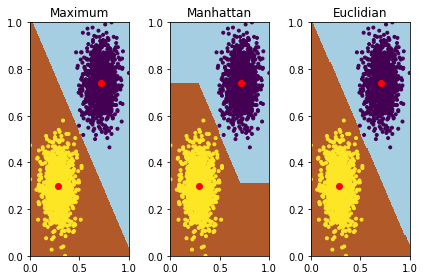

In [5]:
fig, axs = plt.subplots(1,3)
data_scaled['max'] = max_norm.labels
center = max_norm.centroids
axs[0].scatter(data_scaled[0], data_scaled[1], marker='.', c=data_scaled['max'])
axs[0].scatter(center[:,0], center[:, 1], c='red')
xx, yy = np.meshgrid(np.arange(0,1, .01), np.arange(0, 1, .01))
Z = max_norm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[0].imshow(Z, interpolation='nearest', cmap=plt.cm.Paired, aspect='auto', origin='lower', extent=(0, 1, 0, 1))
axs[0].set_title('Maximum')

data_scaled['manhattan'] = manhattan.labels
center = manhattan.centroids
axs[1].scatter(data_scaled[0], data_scaled[1], marker='.', c=data_scaled['manhattan'])
axs[1].scatter(center[:,0], center[:, 1], c='red')
xx, yy = np.meshgrid(np.arange(0,1, .01), np.arange(0, 1, .01))
Z = manhattan.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[1].imshow(Z, interpolation='nearest', cmap=plt.cm.Paired, aspect='auto', origin='lower', extent=(0, 1, 0, 1))
axs[1].set_title('Manhattan')

data_scaled['euclid'] = euclid.labels
center = euclid.centroids
axs[2].scatter(data_scaled[0], data_scaled[1], marker='.', c=data_scaled['euclid'])
axs[2].scatter(center[:,0], center[:, 1], c='red')
xx, yy = np.meshgrid(np.arange(0,1, .01), np.arange(0, 1, .01))
Z = euclid.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
axs[2].imshow(Z, interpolation='nearest', cmap=plt.cm.Paired, aspect='auto', origin='lower', extent=(0, 1, 0, 1))
axs[2].set_title('Euclidian')

# Unterschiede
plt.tight_layout()

plt.savefig('dim2.png', dpi=300)
 

In [6]:
print(max_norm.error)
print(manhattan.error)
print(euclid.error)

30.78456806538771
30.78456806538771
30.78456806538771
